In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# use eda_helper in utils folder in the same directory
sys.path.append('../')  # Add parent directory to Python path
from utils import eda_helper

In [4]:
df=pd.read_csv('../data/eda_data.csv')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,nas_delay,security_delay,late_aircraft_delay,date,controllable_cnt,uncontrollable_cnt,controllable_delay,uncontrollable_delay,delay_rate,controllable_ratio
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,20.0,0.0,17.0,2023-12-01,3.27,1.73,78.0,594.0,0.069444,0.653999
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,33.0,0.0,63.0,2023-12-01,6.00,1.00,315.0,33.0,0.112903,0.857142
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,47.0,0.0,276.0,2023-12-01,8.94,1.06,812.0,47.0,0.105263,0.893999
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,0.0,66.0,2023-12-01,2.00,0.00,75.0,0.0,0.086957,0.999995
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,1487.0,0.0,10299.0,2023-12-01,194.82,61.18,19205.0,2219.0,0.121270,0.761016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2015,1,WN,Southwest Airlines,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,1029.0,92.0,4526.0,2015-01-01,158.00,26.00,7187.0,1244.0,0.206278,0.858696
178743,2015,1,WN,Southwest Airlines,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,301.0,0.0,955.0,2015-01-01,35.80,9.20,1795.0,596.0,0.298013,0.795555
178744,2015,1,WN,Southwest Airlines,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,534.0,0.0,1859.0,2015-01-01,53.00,15.00,2862.0,543.0,0.270916,0.779412
178745,2015,1,WN,Southwest Airlines,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,689.0,0.0,4277.0,2015-01-01,150.60,22.39,6647.0,832.0,0.218159,0.870520


In [6]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'date', 'controllable_cnt',
       'uncontrollable_cnt', 'controllable_delay', 'uncontrollable_delay',
       'delay_rate', 'controllable_ratio'],
      dtype='object')

In [13]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

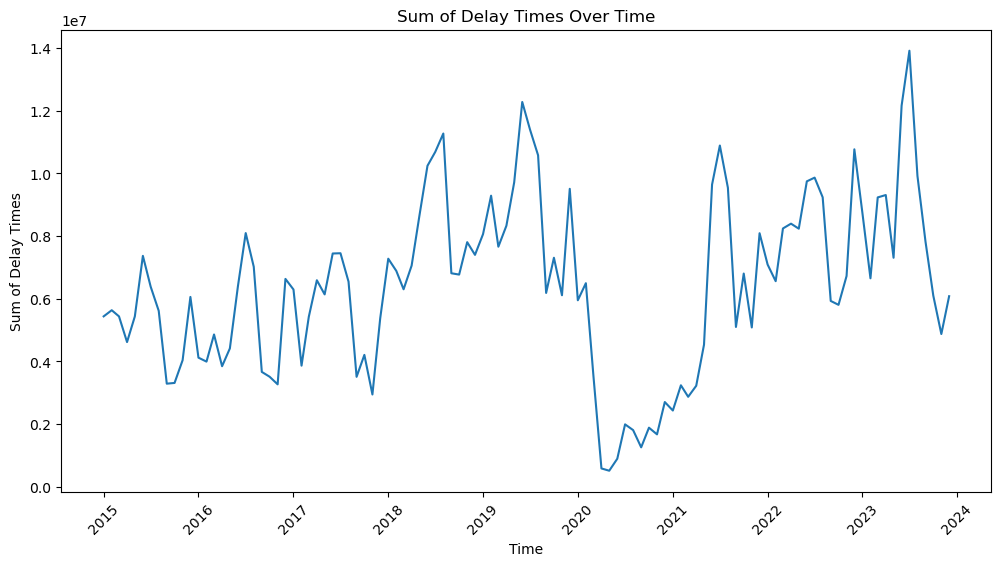

In [14]:
# delay times sum plot as time series
def plot_delay_times_sum(df):
    df_grouped = df.groupby('date')['arr_delay'].sum().reset_index()
    # df_grouped['time'] = pd.to_datetime(df_grouped['date'])
    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x='date', y='arr_delay')
    plt.title('Sum of Delay Times Over Time')
    plt.xlabel('Time')
    plt.ylabel('Sum of Delay Times')
    plt.xticks(rotation=45)
    plt.show()
# Call the function to plot
plot_delay_times_sum(df)

general trend is that delay times are increasing as we proceed in time except for the years affect by COVID-19

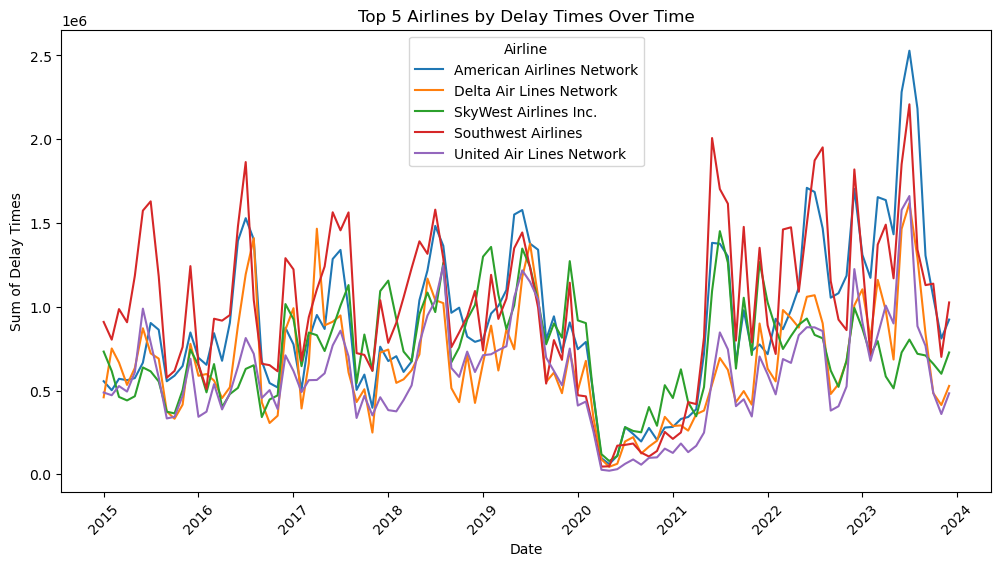

In [16]:
# plot the time series of sum of delay times for top 10 airlines
def plot_top_airlines_delay_times(df, top_n=10):
    # Group by airline and date, then sum the delay times
    df_grouped = df.groupby(['date', 'carrier_name'])['arr_delay'].sum().reset_index()
    
    # Get top N airlines by total delay time
    top_airlines = df_grouped.groupby('carrier_name')['arr_delay'].sum().nlargest(top_n).index

    # Filter the DataFrame for top airlines
    df_top_airlines = df_grouped[df_grouped['carrier_name'].isin(top_airlines)]

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top_airlines, x='date', y='arr_delay', hue='carrier_name')
    plt.title(f'Top {top_n} Airlines by Delay Times Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sum of Delay Times')
    plt.xticks(rotation=45)
    plt.legend(title='Airline')
    plt.show()
# Call the function to plot
plot_top_airlines_delay_times(df, top_n=5)

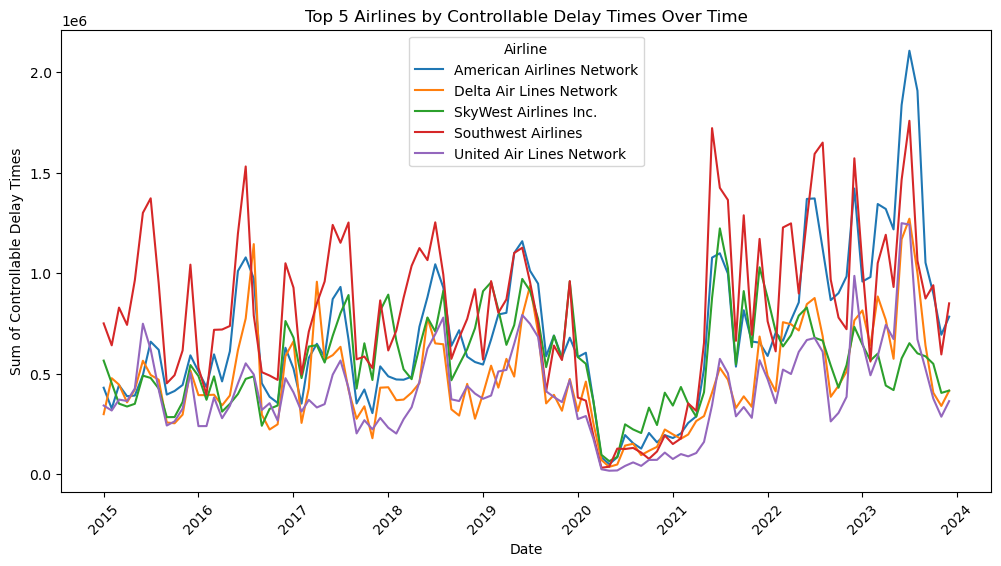

In [17]:
# similarly plot the time series for controllable delay for top 5 carrier_names
def plot_top_airlines_controllable_delay(df, top_n=5):
    # Group by airline and date, then sum the controllable delay times
    df_grouped = df.groupby(['date', 'carrier_name'])['controllable_delay'].sum().reset_index()
    
    # Get top N airlines by total controllable delay time
    top_airlines = df_grouped.groupby('carrier_name')['controllable_delay'].sum().nlargest(top_n).index

    # Filter the DataFrame for top airlines
    df_top_airlines = df_grouped[df_grouped['carrier_name'].isin(top_airlines)]

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top_airlines, x='date', y='controllable_delay', hue='carrier_name')
    plt.title(f'Top {top_n} Airlines by Controllable Delay Times Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sum of Controllable Delay Times')
    plt.xticks(rotation=45)
    plt.legend(title='Airline')
    plt.show()
# Call the function to plot
plot_top_airlines_controllable_delay(df, top_n=5)

American Airlines though has lower count of controllable delays as compared to southwest airlines these cause more amount of delays which is not a good sign

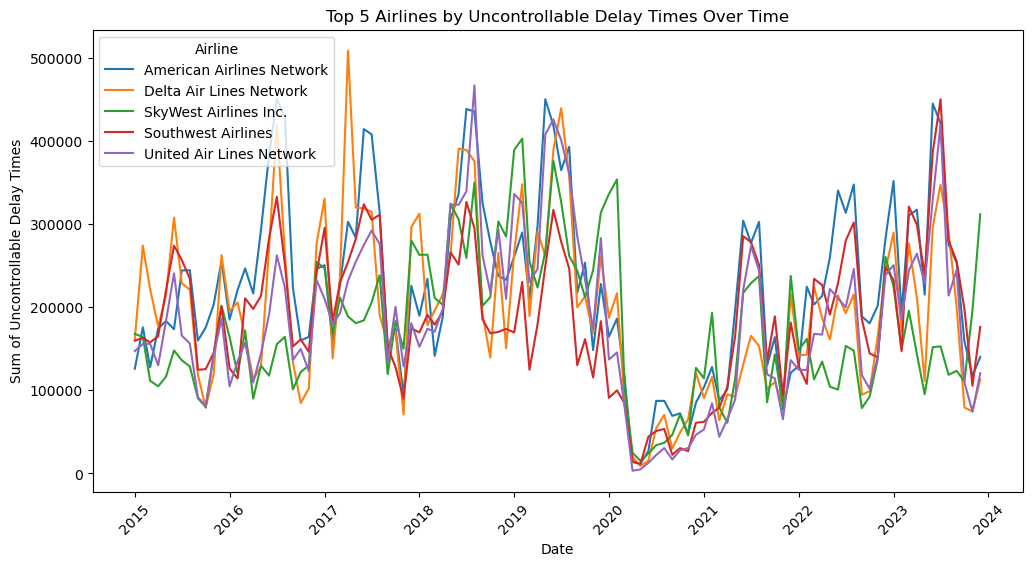

In [18]:
#  similarly give me a time series plot for uncontrollable delay for top 5 carrier_names
def plot_top_airlines_uncontrollable_delay(df, top_n=5):
    # Group by airline and date, then sum the uncontrollable delay times
    df_grouped = df.groupby(['date', 'carrier_name'])['uncontrollable_delay'].sum().reset_index()
    
    # Get top N airlines by total uncontrollable delay time
    top_airlines = df_grouped.groupby('carrier_name')['uncontrollable_delay'].sum().nlargest(top_n).index

    # Filter the DataFrame for top airlines
    df_top_airlines = df_grouped[df_grouped['carrier_name'].isin(top_airlines)]

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top_airlines, x='date', y='uncontrollable_delay', hue='carrier_name')
    plt.title(f'Top {top_n} Airlines by Uncontrollable Delay Times Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sum of Uncontrollable Delay Times')
    plt.xticks(rotation=45)
    plt.legend(title='Airline')
    plt.show()
# Call the function to plot
plot_top_airlines_uncontrollable_delay(df, top_n=5)

American Airlines has moslty been on the top of the uncontrollable over the years but we can see that recently the southwest airlines too has caught up on the number of delays.

In [19]:
# create new columns called controllable_time_ratio and uncontrollable_time_ratio which is time not number
df['controllable_time_ratio'] = df['controllable_delay'] / df['arr_delay']
df['uncontrollable_time_ratio'] = df['uncontrollable_delay'] / df['arr_delay']


In [20]:
# plot the time series of controllable_time_ratio for top 5 carrier_names
def plot_top_airlines_controllable_time_ratio(df, top_n=5):
    # Group by airline and date, then mean the controllable time ratio
    df_grouped = df.groupby(['date', 'carrier_name'])['controllable_time_ratio'].mean().reset_index()
    
    # Get top N airlines by average controllable time ratio
    top_airlines = df_grouped.groupby('carrier_name')['controllable_time_ratio'].mean().nlargest(top_n).index

    # Filter the DataFrame for top airlines
    df_top_airlines = df_grouped[df_grouped['carrier_name'].isin(top_airlines)]

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top_airlines, x='date', y='controllable_time_ratio', hue='carrier_name')
    plt.title(f'Top {top_n} Airlines by Controllable Time Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('Controllable Time Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Airline')
    plt.show()


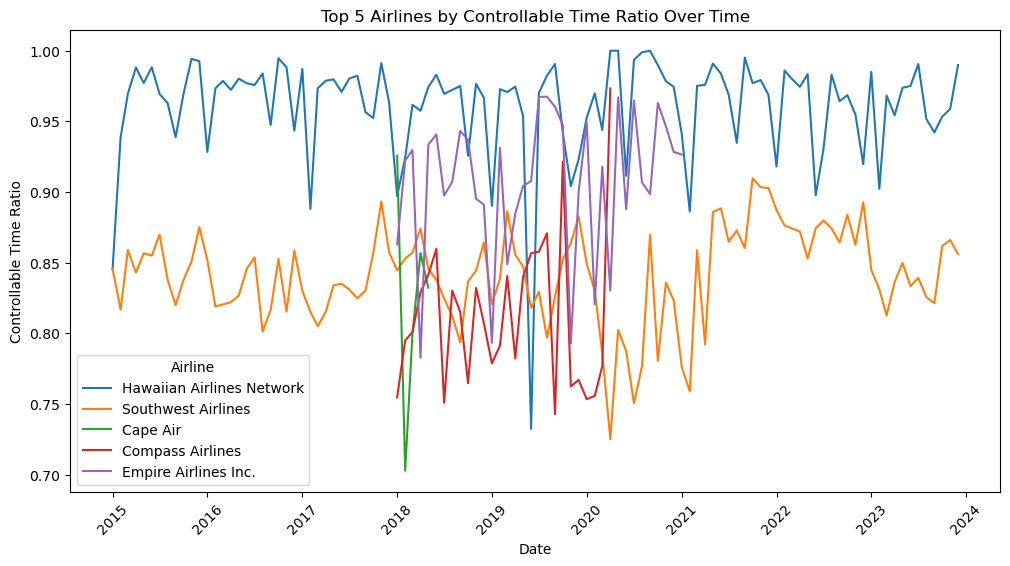

In [21]:
# Call the function to plot
plot_top_airlines_controllable_time_ratio(df, top_n=5)
# plot the time series of uncontrollable_time_ratio for top 5 carrier_names


This is showing an intresting insight that most of the hawain airlines have the highest ration of controllable time meaning large amount of its delays are caused due to controllable causes which is not a good sign

In [22]:
def plot_top_airlines_uncontrollable_time_ratio(df, top_n=5):
    # Group by airline and date, then mean the uncontrollable time ratio
    df_grouped = df.groupby(['date', 'carrier_name'])['uncontrollable_time_ratio'].mean().reset_index()
    
    # Get top N airlines by average uncontrollable time ratio
    top_airlines = df_grouped.groupby('carrier_name')['uncontrollable_time_ratio'].mean().nlargest(top_n).index

    # Filter the DataFrame for top airlines
    df_top_airlines = df_grouped[df_grouped['carrier_name'].isin(top_airlines)]

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top_airlines, x='date', y='uncontrollable_time_ratio', hue='carrier_name')
    plt.title(f'Top {top_n} Airlines by Uncontrollable Time Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('Uncontrollable Time Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Airline')
    plt.show()


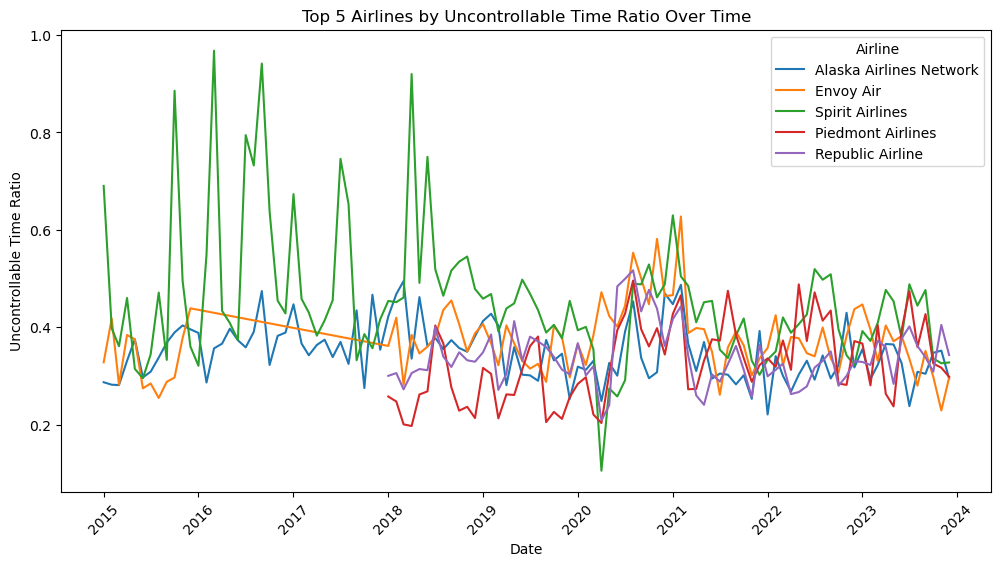

In [23]:
# Call the function to plot
plot_top_airlines_uncontrollable_time_ratio(df, top_n=5)

this is showing that most of the delays of spirit airlines are out of control so may be the need to pray to the climate gods

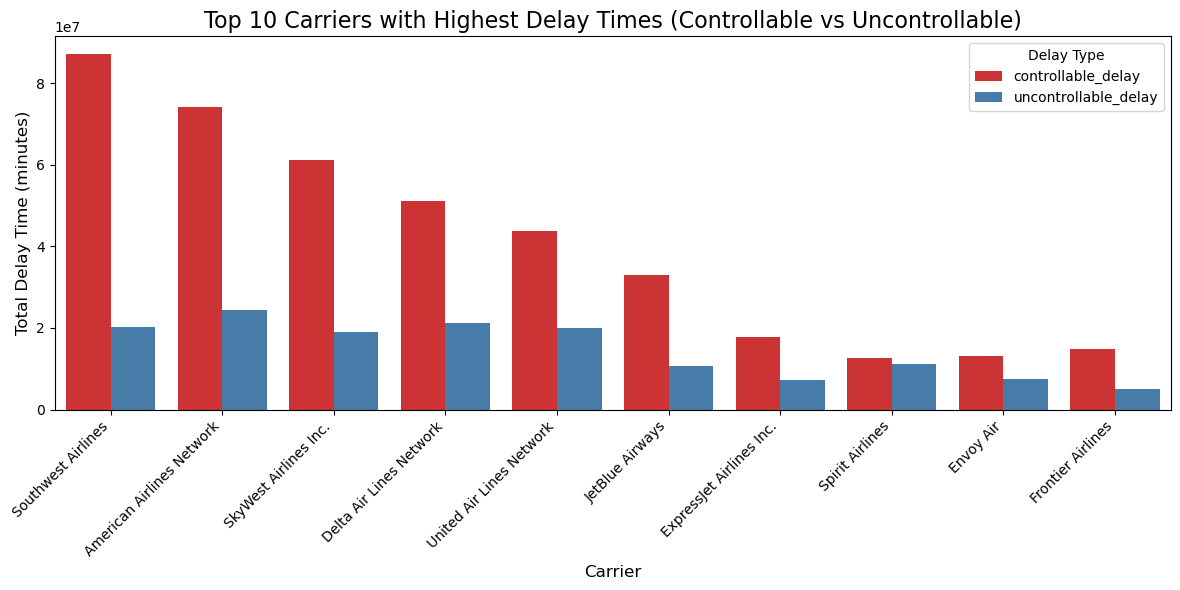

In [31]:
# plot a bar chart for top-10 carrier_names by total delay time and each should have 2 bars for controllable and uncontrollable delay time
top_carriers = df.groupby('carrier_name').agg({
    'arr_delay': 'sum',
    'controllable_delay': 'sum',
    'uncontrollable_delay': 'sum'
}).sort_values(by='arr_delay', ascending=False).head(10)
top_carriers = top_carriers.reset_index()
top_carriers_melted = top_carriers.melt(id_vars='carrier_name',
                                          value_vars=['controllable_delay', 'uncontrollable_delay'],
                                          var_name='delay_type',
                                          value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_carriers_melted, x='carrier_name', y='count', hue='delay_type', palette='Set1')
plt.title("Top 10 Carriers with Highest Delay Times (Controllable vs Uncontrollable)", fontsize=16)
plt.xlabel("Carrier", fontsize=12)
plt.ylabel("Total Delay Time (minutes)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Type', fontsize=10)
plt.tight_layout()
plt.show()


In [30]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'date', 'controllable_cnt',
       'uncontrollable_cnt', 'controllable_delay', 'uncontrollable_delay',
       'delay_rate', 'controllable_ratio', 'controllable_time_ratio',
       'uncontrollable_time_ratio'],
      dtype='object')

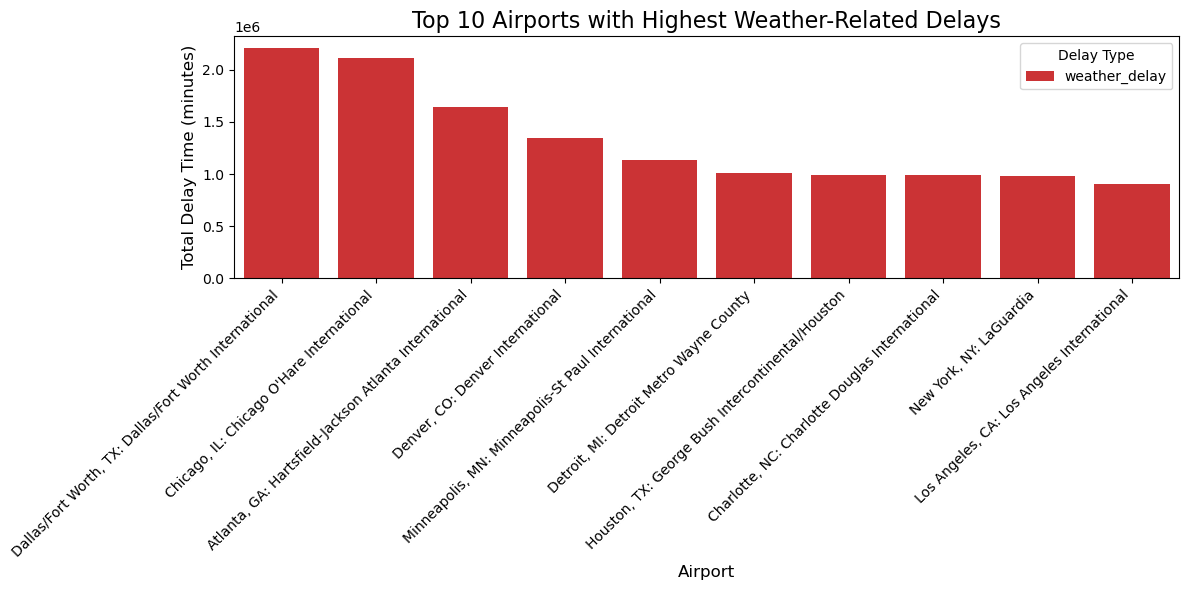

In [32]:
# plot the top-10 airports having highest delay times wrt to weather only
top_airports_weather = df[df['weather_delay'] > 0].groupby('airport_name').agg({
    'arr_delay': 'sum',
    'weather_delay': 'sum'
}).sort_values(by='weather_delay', ascending=False).head(10)
top_airports_weather = top_airports_weather.reset_index()
top_airports_weather_melted = top_airports_weather.melt(id_vars='airport_name',
                                                         value_vars=['weather_delay'],
                                                         var_name='delay_type',
                                                         value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_airports_weather_melted, x='airport_name', y='count', hue='delay_type', palette='Set1')
plt.title("Top 10 Airports with Highest Weather-Related Delays", fontsize=16)
plt.xlabel("Airport", fontsize=12)
plt.ylabel("Total Delay Time (minutes)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Type', fontsize=10)
plt.tight_layout()
plt.show()
# plot the top-10 airports having highest delay times wrt to security only

Dallas/Fort Worth (DFW):
-	DFW is frequently hit by severe weather, including thunderstorms, heavy rain, hail, and strong winds, especially during spring and summer. These weather events often prompt ground stops and extensive delays, as seen in recent incidents where severe storms led to hundreds of cancellations and delays, with average delays exceeding two hours.
-	As a major hub for American Airlines, disruptions at DFW ripple through the airline’s entire network, amplifying the impact of local weather on national operations.


Chicago O’Hare (ORD):
-	ORD is notorious for weather-related disruptions, particularly in winter (snow, ice, freezing drizzle) and spring/summer (thunderstorms). Ground stops and lengthy delays due to snow and storms are common, with recent examples showing ground delays averaging over two hours and widespread cancellations.
-	The airport’s high traffic volume and its status as a major connecting hub make it especially vulnerable to cascading delays when weather hits.


Atlanta (ATL):
-	ATL, the world’s busiest airport, is often affected by severe thunderstorms, especially in late spring and summer. These storms can prompt FAA ground stops and widespread delays, as seen in recent events where hundreds of flights were delayed or halted due to storms and even tornado warnings.
-	The sheer volume of flights and connections at ATL means that even brief weather disruptions can lead to significant delays system-wide.

In [33]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'date', 'controllable_cnt',
       'uncontrollable_cnt', 'controllable_delay', 'uncontrollable_delay',
       'delay_rate', 'controllable_ratio', 'controllable_time_ratio',
       'uncontrollable_time_ratio'],
      dtype='object')

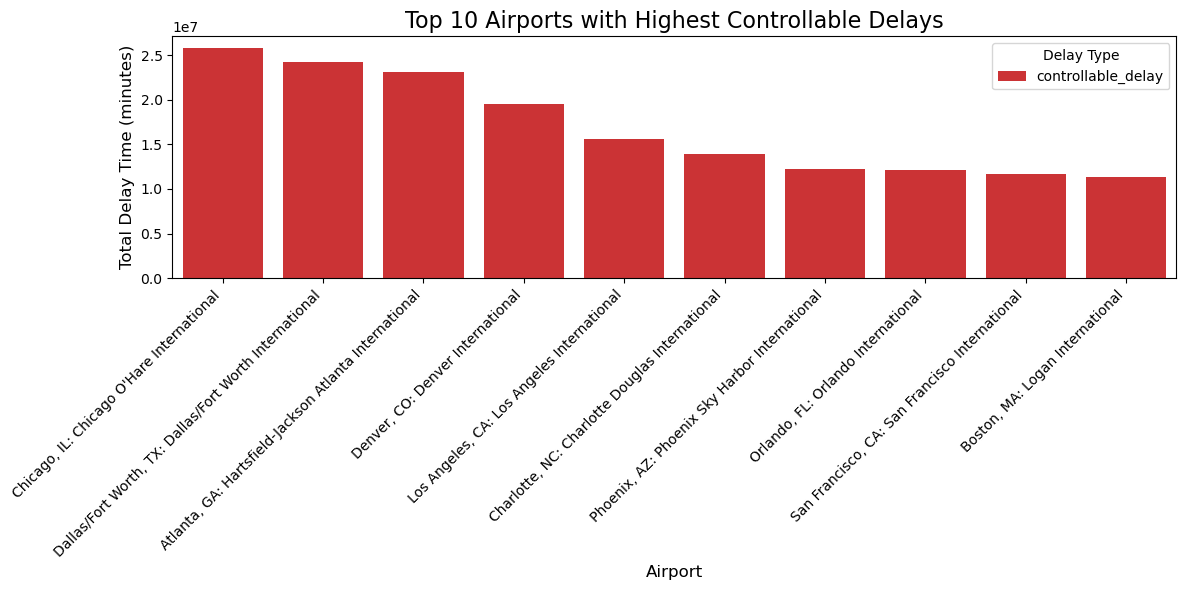

In [34]:
# plot a bar chart of top-10 airports wrt to controllable delay times
top_airports_controllable = df[df['controllable_delay'] > 0].groupby('airport_name').agg({
    'arr_delay': 'sum',
    'controllable_delay': 'sum'
}).sort_values(by='controllable_delay', ascending=False).head(10)
top_airports_controllable = top_airports_controllable.reset_index()
top_airports_controllable_melted = top_airports_controllable.melt(id_vars='airport_name',
                                                                    value_vars=['controllable_delay'],
                                                                    var_name='delay_type',
                                                                    value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_airports_controllable_melted, x='airport_name', y='count', hue='delay_type', palette='Set1')
plt.title("Top 10 Airports with Highest Controllable Delays", fontsize=16)      
plt.xlabel("Airport", fontsize=12)
plt.ylabel("Total Delay Time (minutes)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Type', fontsize=10)
plt.tight_layout()
plt.show()

# Multivariate analysis 

In [35]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_delay,date,controllable_cnt,uncontrollable_cnt,controllable_delay,uncontrollable_delay,delay_rate,controllable_ratio,controllable_time_ratio,uncontrollable_time_ratio
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,17.0,2023-12-01,3.27,1.73,78.0,594.0,0.069444,0.653999,0.116071,0.883929
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,63.0,2023-12-01,6.00,1.00,315.0,33.0,0.112903,0.857142,0.905172,0.094828
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,276.0,2023-12-01,8.94,1.06,812.0,47.0,0.105263,0.893999,0.945285,0.054715
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,66.0,2023-12-01,2.00,0.00,75.0,0.0,0.086957,0.999995,1.000000,0.000000
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,10299.0,2023-12-01,194.82,61.18,19205.0,2219.0,0.121270,0.761016,0.896425,0.103575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2015,1,WN,Southwest Airlines,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,4526.0,2015-01-01,158.00,26.00,7187.0,1244.0,0.206278,0.858696,0.852449,0.147551
178743,2015,1,WN,Southwest Airlines,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,955.0,2015-01-01,35.80,9.20,1795.0,596.0,0.298013,0.795555,0.750732,0.249268
178744,2015,1,WN,Southwest Airlines,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,1859.0,2015-01-01,53.00,15.00,2862.0,543.0,0.270916,0.779412,0.840529,0.159471
178745,2015,1,WN,Southwest Airlines,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,4277.0,2015-01-01,150.60,22.39,6647.0,832.0,0.218159,0.870520,0.888755,0.111245


In [38]:
eda_helper.num_cat_hyp_testing(df,'arr_delay','carrier_name')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 322.89152227083446
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and carrier_name are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 25570.32123983729
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and carrier_name are associated to each other


In [39]:
eda_helper.num_cat_hyp_testing(df,'arr_delay','airport_name')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 116.08679646175771
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and airport_name are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 40663.20427983748
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and airport_name are associated to each other


In [40]:
eda_helper.num_cat_hyp_testing(df,'controllable_delay','airport_name')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 101.56900164955124
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables controllable_delay and airport_name are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 37226.414258878234
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables controllable_delay and airport_name are associated to each other


In [41]:
eda_helper.num_cat_hyp_testing(df,'arr_delay','carrier_name')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 322.89152227083446
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and carrier_name are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 25570.32123983729
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables arr_delay and carrier_name are associated to each other


As expected according to the correlation heatmap all the tests are postive

# Flights with no delay at all in a month

In [42]:
df[df['arr_del15']==0]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_delay,date,controllable_cnt,uncontrollable_cnt,controllable_delay,uncontrollable_delay,delay_rate,controllable_ratio,controllable_time_ratio,uncontrollable_time_ratio
15,2023,12,9E,Endeavor Air Inc.,BOS,"Boston, MA: Logan International",16.0,0.0,0.0,0.0,...,0.0,2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
27,2023,12,9E,Endeavor Air Inc.,CMH,"Columbus, OH: John Glenn Columbus International",44.0,0.0,0.0,0.0,...,0.0,2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
97,2023,12,9E,Endeavor Air Inc.,SBN,"South Bend, IN: South Bend International",1.0,0.0,0.0,0.0,...,0.0,2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
111,2023,12,AA,American Airlines Network,AGS,"Augusta, GA: Augusta Regional at Bush Field",2.0,0.0,0.0,0.0,...,0.0,2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
125,2023,12,AA,American Airlines Network,BTV,"Burlington, VT: Burlington International",7.0,0.0,0.0,0.0,...,0.0,2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178469,2015,1,OO,SkyWest Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",1.0,0.0,0.0,0.0,...,0.0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
178475,2015,1,OO,SkyWest Airlines Inc.,LEX,"Lexington, KY: Blue Grass",4.0,0.0,0.0,0.0,...,0.0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
178484,2015,1,OO,SkyWest Airlines Inc.,GUC,"Gunnison, CO: Gunnison-Crested Butte Regional",1.0,0.0,0.0,0.0,...,0.0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
178629,2015,1,US,US Airways Inc.,ILM,"Wilmington, NC: Wilmington International",1.0,0.0,0.0,0.0,...,0.0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


<Figure size 2000x1000 with 0 Axes>

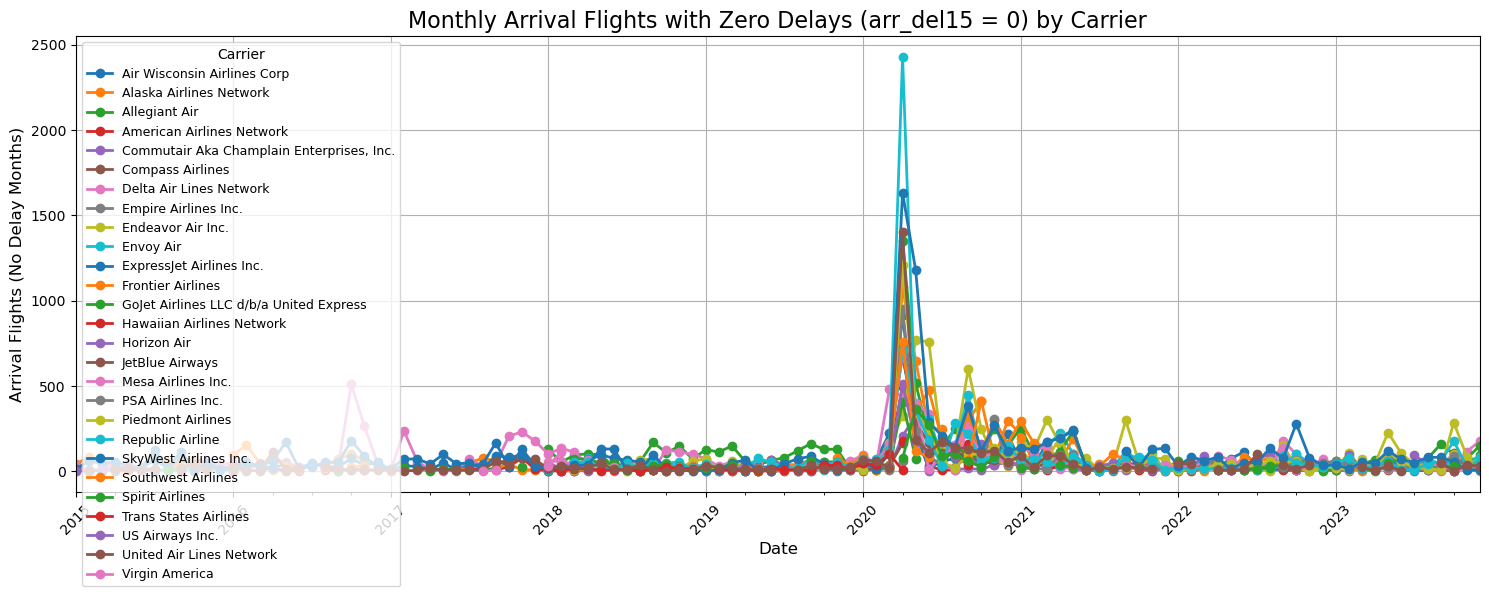

In [44]:
no_delay_df = df[df['arr_del15'] == 0]

# Step 3: Group by date and carrier_name, sum arr_flights
carrier_time_series = (
    no_delay_df
    .groupby(['date', 'carrier_name'])['arr_flights']
    .sum()
    .reset_index()
)

# Step 4: Pivot so each carrier gets its own time series line
pivot_df = carrier_time_series.pivot(index='date', columns='carrier_name', values='arr_flights')

# Step 5: Plot
plt.figure(figsize=(20, 10))
pivot_df.plot(marker='o', linewidth=2, figsize=(15, 6))

plt.title("Monthly Arrival Flights with Zero Delays (arr_del15 = 0) by Carrier", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Arrival Flights (No Delay Months)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Carrier", fontsize=9)
plt.tight_layout()
plt.show()

### The lesser popular flights where the number of flights are lesser than 1000 for most of them are puntual. It makes sense

In [48]:
df[['carrier_name','airport_name','year','month']]

,carrier_name,airport_name,year,month
0,Endeavor Air Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",2023,12
1,Endeavor Air Inc.,"Alexandria, LA: Alexandria International",2023,12
2,Endeavor Air Inc.,"Augusta, GA: Augusta Regional at Bush Field",2023,12
3,Endeavor Air Inc.,"Albany, NY: Albany International",2023,12
4,Endeavor Air Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2023,12
...,...,...,...,...
178742,Southwest Airlines,"Ontario, CA: Ontario International",2015,1
178743,Southwest Airlines,"Norfolk, VA: Norfolk International",2015,1
178744,Southwest Airlines,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",2015,1
178745,Southwest Airlines,"Portland, OR: Portland International",2015,1


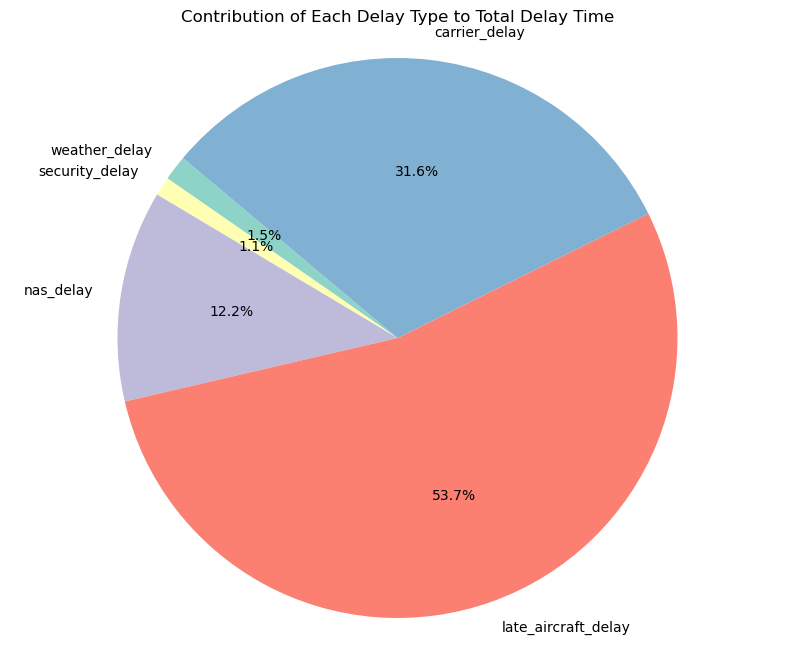

In [52]:
# since arr_delay is sum of weather_delay, security_delay, nas_delay, late_aircraft_delay, and carrier_delay
# plot a pie chart showing contribution of each delay type to total delay time for whichever year,month,carrier_name,airport_name i ask for

def plot_delay_contribution_pie(df, year=None, month=None, carrier_name=None, airport_name=None):
    # Filter the DataFrame based on the provided parameters
    if year is not None:
        df = df[df['year'] == year]
    if month is not None:
        df = df[df['month'] == month]
    if carrier_name is not None:
        df = df[df['carrier_name'] == carrier_name]
    if airport_name is not None:
        df = df[df['airport_name'] == airport_name]

    # Calculate total delay time for each type
    delay_types = ['weather_delay', 'security_delay', 'nas_delay', 'late_aircraft_delay', 'carrier_delay']
    total_delays = df[delay_types].sum()
    # Create a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(total_delays, labels=total_delays.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", n_colors=len(total_delays)))
    plt.title('Contribution of Each Delay Type to Total Delay Time')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
# Call the function to plot
plot_delay_contribution_pie(df,year=2015, month=1, carrier_name='Southwest Airlines', airport_name='Ontario, CA: Ontario International')

In [54]:
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.                        23756
Delta Air Lines Network                      14928
Envoy Air                                    11271
American Airlines Network                    10906
United Air Lines Network                     10395
Southwest Airlines                           10051
ExpressJet Airlines Inc.                      8752
Allegiant Air                                 8698
Frontier Airlines                             8295
Alaska Airlines Network                       7752
Endeavor Air Inc.                             7450
Mesa Airlines Inc.                            6830
JetBlue Airways                               6822
PSA Airlines Inc.                             6537
Republic Airline                              6045
Spirit Airlines                               4941
Air Wisconsin Airlines Corp                   4434
Piedmont Airlines                             4148
GoJet Airlines LLC d/b/a United Express       3912
Commutair Aka Cham

# American Airlines in 2023 

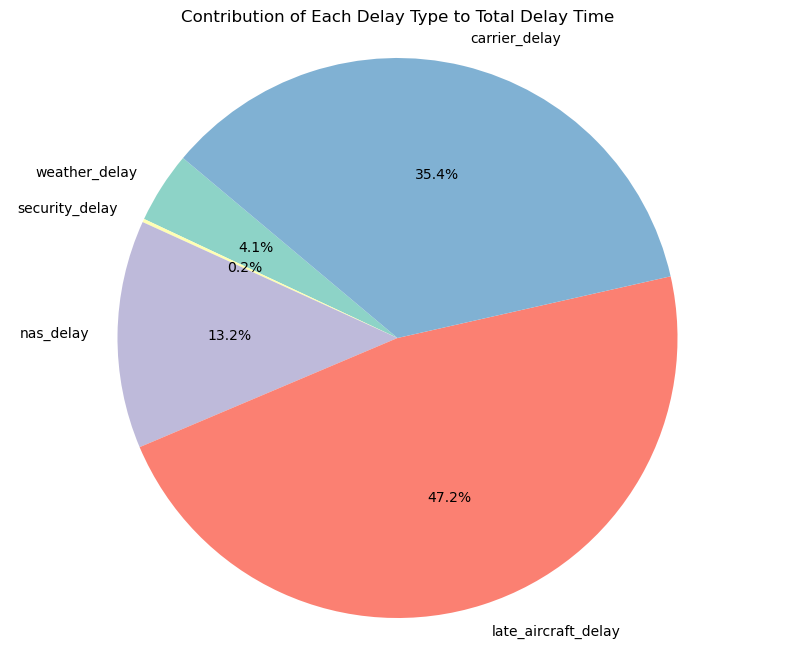

In [55]:
# use this to plot for american airlines in 2023 for all the months
plot_delay_contribution_pie(df, year=2023, carrier_name='American Airlines Network')

evident that controllable delay leads to the most number of delays 